# *DAY-11 Assignment*

In [10]:
pip install scikit-learn yellowbrick pandas


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


 # **PART-A**

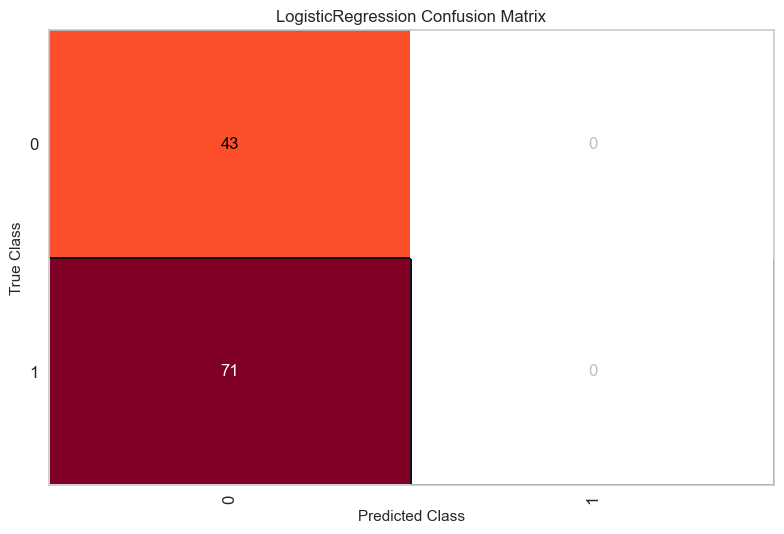

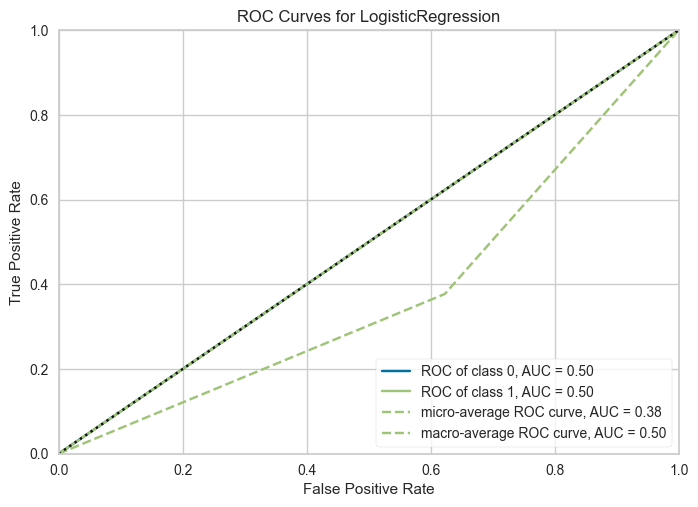

<Axes: title={'center': 'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [17]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import ConfusionMatrix, ROCAUC
from sklearn.pipeline import Pipeline

data = load_breast_cancer()
X_a, y_a = data.data, data.target
X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X_a, y_a, test_size=0.2, random_state=42)

pipe_a = Pipeline([
    ('scaler', MinMaxScaler()),
    ('lr', LogisticRegression(max_iter=10000, random_state=42))])
pipe_a.fit(X_train_a, y_train_a)

cm_a= ConfusionMatrix(pipe_a.named_steps['lr'])
cm_a.fit(X_train_a, y_train_a)
cm_a.score(X_test_a, y_test_a)
cm_a.show()

roc_a = ROCAUC(pipe_a.named_steps['lr'])
roc_a.fit(X_train_a, y_train_a)
roc_a.score(X_test_a, y_test_a)
roc_a.show()


# **PART-B**

Best parameters: {'lr__C': 10}
Best CV accuracy: 0.9714285714285715
Test accuracy: 0.9736842105263158


C:\Users\Seshagiri\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\Seshagiri\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


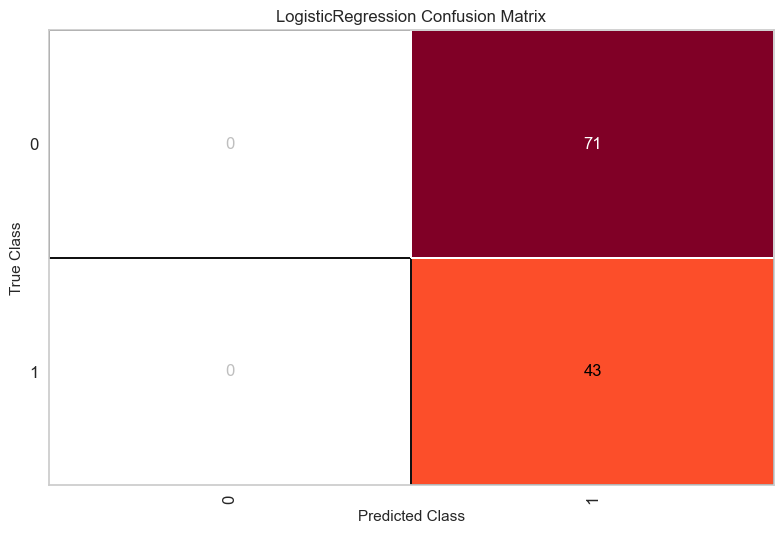

C:\Users\Seshagiri\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\Seshagiri\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


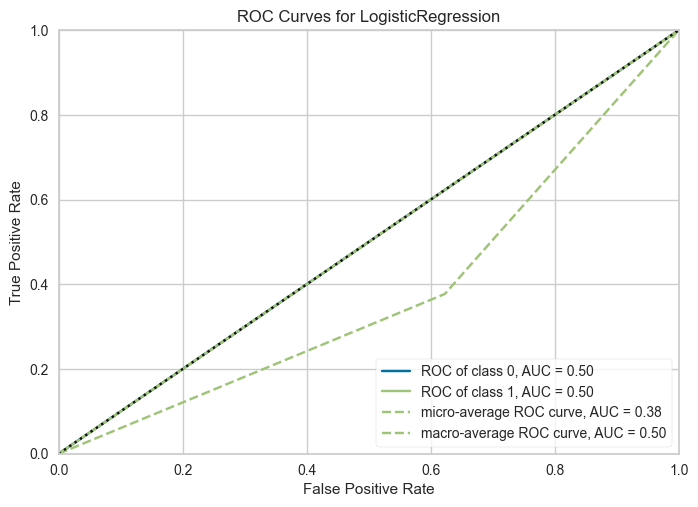

<Axes: title={'center': 'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import ConfusionMatrix, ROCAUC
from sklearn.pipeline import Pipeline

columns = ['id', 'diagnosis', 
           'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 
           'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
           'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
           'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se', 'fractal_dimension_se',
           'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst',
           'compactness_worst', 'concavity_worst', 'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst']

df = pd.read_csv("code/data/breast_cancer.csv", header=None, names=columns)

df.drop(columns='id', inplace=True)
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])

X_b = df.drop('diagnosis', axis=1)
y_b = df['diagnosis']
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_b, y_b, test_size=0.2, random_state=42)

pipe_b = Pipeline([
    ('scaler', MinMaxScaler()),
    ('lr', LogisticRegression(max_iter=10000, random_state=42))])

param_grid = {'lr__C': [0.1, 1, 10]}  
grid = GridSearchCV(pipe_b, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_b, y_train_b)

print("Best parameters:", grid.best_params_)
print("Best CV accuracy:", grid.best_score_)
print("Test accuracy:", grid.score(X_test_b, y_test_b))

cm_b= ConfusionMatrix(grid.best_estimator_.named_steps['lr'])
cm_b.fit(X_train_b, y_train_b)
cm_b.score(X_test_b, y_test_b)
cm_b.show()

roc_b= ROCAUC(grid.best_estimator_.named_steps['lr'])
roc_b.fit(X_train_b, y_train_b)
roc_b.score(X_test_b, y_test_b)
roc_b.show()
